# 06.1 영문 형태소분석기 소개와 한글 분석의 한계

## 6.1.1 형태소 소개와 영문 형태소분석기 설치

In [1]:
# 폰트 설저형태소분석기 다운로드
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 6.1.2 영문 형태소분석기의 활용

In [2]:
# 영문 형태소 분석
import nltk

sentence = '''
beautiful Emma refused to permit us to obtain the refuse permit.
At eight o'clock on Thursday morning Arthur didn't feel very good'''

tokens = nltk.word_tokenize(sentence)
print('1', tokens)
tagged = nltk.tag.pos_tag(tokens)
print('2',tagged)

nouns_list = [t[0] for t in tagged if t[1] == "NN"]
nouns_list

1 ['beautiful', 'Emma', 'refused', 'to', 'permit', 'us', 'to', 'obtain', 'the', 'refuse', 'permit', '.', 'At', 'eight', "o'clock", 'on', 'Thursday', 'morning', 'Arthur', 'did', "n't", 'feel', 'very', 'good']
2 [('beautiful', 'JJ'), ('Emma', 'NNP'), ('refused', 'VBD'), ('to', 'TO'), ('permit', 'VB'), ('us', 'PRP'), ('to', 'TO'), ('obtain', 'VB'), ('the', 'DT'), ('refuse', 'NN'), ('permit', 'NN'), ('.', '.'), ('At', 'IN'), ('eight', 'CD'), ("o'clock", 'NN'), ('on', 'IN'), ('Thursday', 'NNP'), ('morning', 'NN'), ('Arthur', 'NNP'), ('did', 'VBD'), ("n't", 'RB'), ('feel', 'VB'), ('very', 'RB'), ('good', 'JJ')]


['refuse', 'permit', "o'clock", 'morning']

# 06.2 한글 택스트 분석 환경설정과 한글 형태소분석기 설치

## 6.2.1 한글 그래프 도식을 위한 폰트 환경설정

In [3]:
# 폰트 다운로드 및 경로확인
!apt install fonts-nanum fonts-nanum-extra
!ls /usr/share/fonts/truetype/nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-extra
0 upgraded, 2 newly installed, 0 to remove and 45 not upgraded.
Need to get 31.4 MB of archives.
After this operation, 120 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0 MB]
Fetched 31.4 MB in 2s (19.4 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (202

In [4]:
# 맷플로리브에 폰트 경로지정 및 추가
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.font_manager.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
mpl.rc('font', family='NanumGothic')
plt.rc("axes", unicode_minus=False)

<Axes: title={'center': '한글'}>

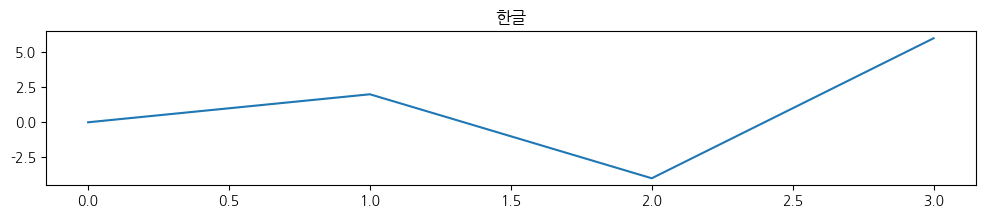

In [5]:
import pandas as pd
pd.Series([0,2,-4,6]).plot(title="한글", figsize=(12, 2))

## 6.2.2 한글형태소분석 라이브러리 설치

1. 파이썬 한국어 NLP 참조 :  https://konlpy.org/ko/latest/

2. KoNLPy.tag로 제공하는 형태소 분석기에는 Hannanum Class(한나눔), Kkma Class(꼬꼬마), Komoran Class(코모란), Mecab Class(메캅), Okt Class(Open Korean Text) 형태소 분석기 들이 있다.

- 한나눔 메뉴얼 참조 : https://www.sketchengine.eu/wp-content/uploads/Original-HanNanum-manual.pdf
- 꼬꼬마 참조 : http://kkma.snu.ac.kr/
- mecab은 별도 설치 : curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

3. 영문 형태소 분석 참고 : https://www.nltk.org/



형태소(morphemes)는 의미를 가지는 가장 작은 단위이며  
문서(document) > 문단(paragraph) > 문장(sentence) > 형태소(morphs), 형태소 품사(pos, Part Of Speech)나 명사(nouns)로 분류

In [6]:
# 한글형태소분석기 라이브러리 설치 Mecab 포함 : 약 2분 소요
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220429.sh
%cd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 47.0 MB/s eta 0:00:00
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 19.73 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-04-13 14:13:52--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.1, 18.205.93.2, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.0|:443... connected.
HTTP request sent, awaiting response

## 6.2.3 한글형태소분석기 불러오기

In [7]:
# 한글 형태소분석기 클래스 불러오기
from konlpy.tag import Hannanum, Komoran, Kkma, Okt, Mecab
text = '홍길동 전화번호는 Kt 1234-5678번 입니까?'

komoran = Komoran()
print(komoran.pos(text))

okt = Okt()
print(okt.pos(text))

mecab = Mecab()
print(mecab.pos(text))

[('홍길동', 'NNP'), ('전화번호', 'NNP'), ('는', 'JX'), ('Kt', 'SL'), ('1234', 'SN'), ('-', 'SW'), ('5678', 'SN'), ('번', 'NNB'), ('입', 'VV'), ('니까', 'EF'), ('?', 'SF')]
[('홍길동', 'Noun'), ('전화번호', 'Noun'), ('는', 'Josa'), ('Kt', 'Alpha'), ('1234-5678', 'Number'), ('번', 'Noun'), ('입', 'Noun'), ('니까', 'Josa'), ('?', 'Punctuation')]
[('홍길동', 'NNG'), ('전화', 'NNG'), ('번호', 'NNG'), ('는', 'JX'), ('Kt', 'SL'), ('1234', 'SN'), ('-', 'SY'), ('5678', 'SN'), ('번', 'NNBC'), ('입니까', 'VCP+EF'), ('?', 'SF')]


# 06.3 한글 형태소분석기 활용

## 6.3.1 한글형태소분석기 불러오기

In [8]:
# 형태소 분석
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.morphs(text))
print(mecab.nouns(text))
print(mecab.pos(text))

['홍길동', '전화', '번호', '는', 'Kt', '1234', '-', '5678', '번', '입니까', '?']
['홍길동', '전화', '번호', '번']
[('홍길동', 'NNG'), ('전화', 'NNG'), ('번호', 'NNG'), ('는', 'JX'), ('Kt', 'SL'), ('1234', 'SN'), ('-', 'SY'), ('5678', 'SN'), ('번', 'NNBC'), ('입니까', 'VCP+EF'), ('?', 'SF')]


In [9]:
# tagset 보기
print(mecab.tagset)

{'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ETM': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JKB': '부사격 조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JKV': '호격 조사', 'JX': '보조사', 'MAG': '일반 부사', 'MAJ': '접속 부사', 'MM': '관형사', 'NNB': '의존 명사', 'NNBC': '단위를 나타내는 명사', 'NNG': '일반 명사', 'NNP': '고유 명사', 'NP': '대명사', 'NR': '수사', 'SC': '구분자 , · / :', 'SE': '줄임표 …', 'SF': '마침표, 물음표, 느낌표', 'SH': '한자', 'SL': '외국어', 'SN': '숫자', 'SSC': '닫는 괄호 ), ]', 'SSO': '여는 괄호 (, [', 'SY': '기타 기호', 'VA': '형용사', 'VCN': '부정 지정사', 'VCP': '긍정 지정사', 'VV': '동사', 'VX': '보조 용언', 'XPN': '체언 접두사', 'XR': '어근', 'XSA': '형용사 파생 접미사', 'XSN': '명사파생 접미사', 'XSV': '동사 파생 접미사'}


##  6.3.2 형태소 분석기를 활용한 명사추출과 빈도 분석

In [10]:
#헌법전문을 읽어들이고 문장별로 분리해서 리스트로 정리
from konlpy.corpus import kolaw
from collections import Counter
kolaw.fileids()
con_para = kolaw.open('constitution.txt').read()
nouns = mecab.nouns(con_para)
nouns = [n for n in nouns if len(n) > 1]
count = Counter(nouns)
top = count.most_common(20)
print(top)

[('법률', 121), ('대통령', 84), ('국가', 73), ('헌법', 69), ('국민', 69), ('국회', 69), ('필요', 31), ('위원', 30), ('기타', 26), ('법원', 25), ('보장', 24), ('정부', 23), ('사항', 23), ('국무', 23), ('자유', 21), ('권리', 21), ('선거', 21), ('의원', 21), ('회의', 21), ('경제', 20)]


## 6.3.3 빈도분석과 시각화

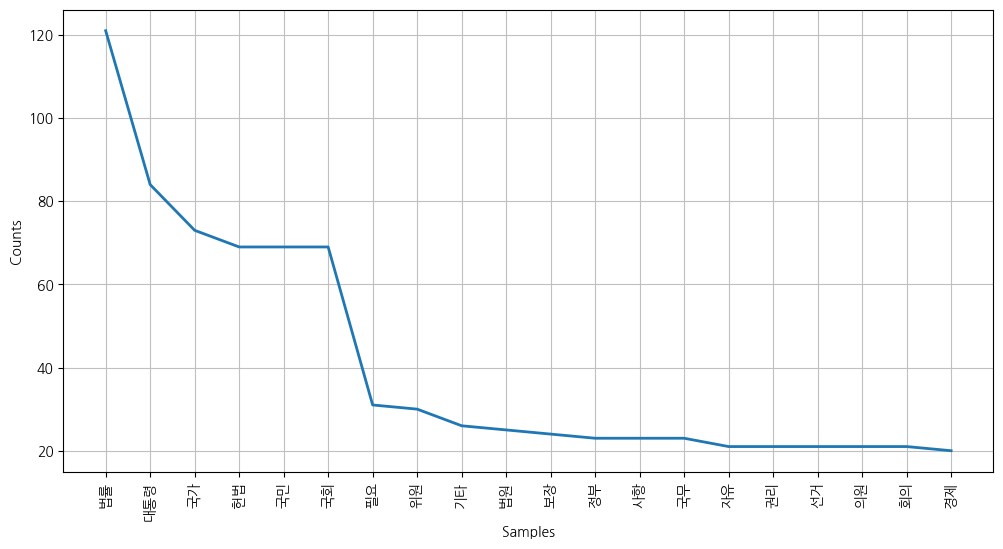

<Axes: xlabel='Samples', ylabel='Counts'>

In [11]:
import nltk
key_words = nltk.Text(nouns)
plt.figure(figsize=(12,6))
key_words.plot(20)

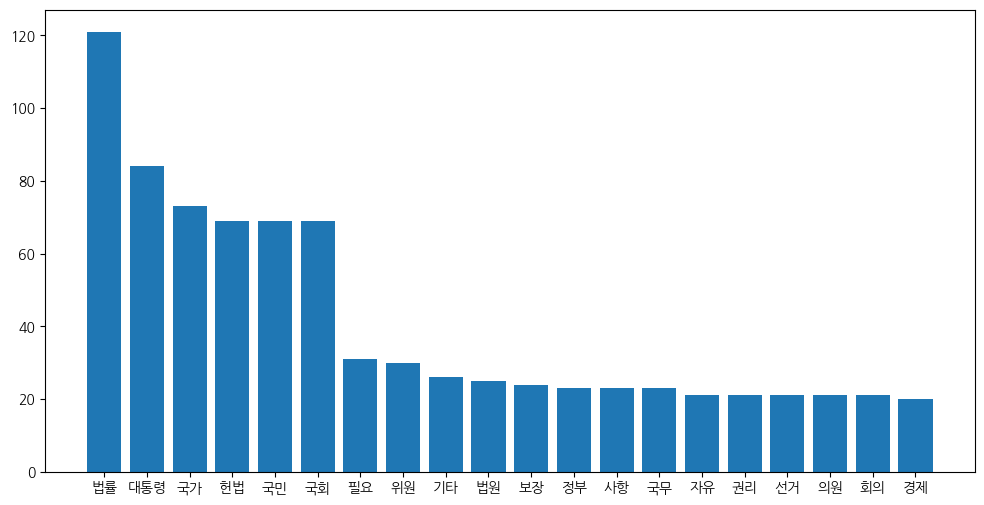

In [12]:
# 히스토그램 그리기
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='NanumGothic')

x = np.arange(len(top))
keys = [x[0] for x in top]
values = [x[1] for x in top]
plt.figure(figsize=(12,6))
plt.bar(x, values)
plt.xticks(x, keys)

plt.show()

# 6.4 영어불용어 사전 활용과 한글 불용어 처리

## 6.4.1 영어 불용어 사전과 불용어 처리

In [13]:
# 영어 불용어 처리
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop_words = list(stopwords.words('english'))
print(len(stop_words), stop_words[:10])

179 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
text = "I am a student. you're a teacher."
tokens = nltk.word_tokenize(text)
result = [word for word in tokens if not word in stop_words]
print('불용어 제거 전 :',tokens)
print('불용어 제거 후 :',result)

불용어 제거 전 : ['I', 'am', 'a', 'student', '.', 'you', "'re", 'a', 'teacher', '.']
불용어 제거 후 : ['I', 'student', '.', "'re", 'teacher', '.']


## 6.4.2 한글 불용어 처리 방법

In [15]:
!wget https://raw.githubusercontent.com/byungjooyoo/Dataset/main/korean_stopwords.txt
with open('korean_stopwords.txt', 'r') as f:
    stop_words = f.read().split("\n")
print(len(stop_words), stop_words[:10])
stop_words = ['는', '두']+stop_words
print(len(stop_words), stop_words[:10])

--2024-04-13 14:16:32--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/korean_stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7007 (6.8K) [text/plain]
Saving to: ‘korean_stopwords.txt’

korean_stopwords.tx 100%[===================>]   6.84K  --.-KB/s    in 0s      

2024-04-13 14:16:32 (55.8 MB/s) - ‘korean_stopwords.txt’ saved [7007/7007]

675 ['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']
677 ['는', '두', '아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리']


In [16]:
# 처리 전후 비교
tokens = ['아', '아이쿠', '김철수', '는', '극중', '두', '인격', '의', '사나이', '이광수', '역', '을', '맡았다']
result = [word for word in tokens if not word in stop_words]
print('불용어 제거 전 :',tokens)
print('불용어 제거 후 :',result)

불용어 제거 전 : ['아', '아이쿠', '김철수', '는', '극중', '두', '인격', '의', '사나이', '이광수', '역', '을', '맡았다']
불용어 제거 후 : ['김철수', '극중', '인격', '사나이', '이광수', '역', '맡았다']


# 6.5사례분석 : 키워드 빈도분석 사례

In [17]:
# 대통령 취임사 파일
!wget https://raw.githubusercontent.com/byungjooyoo/Dataset/main/president_message.txt
para = open('president_message.txt', 'r').read()
print(para[:100])

--2024-04-13 14:16:32--  https://raw.githubusercontent.com/byungjooyoo/Dataset/main/president_message.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8497 (8.3K) [text/plain]
Saving to: ‘president_message.txt’

president_message.t 100%[===================>]   8.30K  --.-KB/s    in 0s      

2024-04-13 14:16:32 (85.0 MB/s) - ‘president_message.txt’ saved [8497/8497]

존경하고 사랑하는 국민 여러분, 750만 재외동포 여러분 그리고 자유를 사랑하는 세계 시민 여러분, 저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로 국민이 진정한 주인인 나


In [18]:
#Collections 라이브러리 이용
nouns = mecab.nouns(para)
nouns = [n for n in nouns if len(n) > 1]

# 3. 단어 숫자 세기
count = Counter(nouns)
top = count.most_common(20)
print(top)

[('자유', 32), ('우리', 19), ('여러분', 16), ('국민', 15), ('시민', 15), ('나라', 14), ('세계', 13), ('사회', 12), ('평화', 12), ('국제', 9), ('해결', 9), ('위기', 8), ('존경', 7), ('문제', 7), ('가치', 7), ('연대', 6), ('경제', 5), ('감사', 5), ('국가', 5), ('민주주의', 5)]


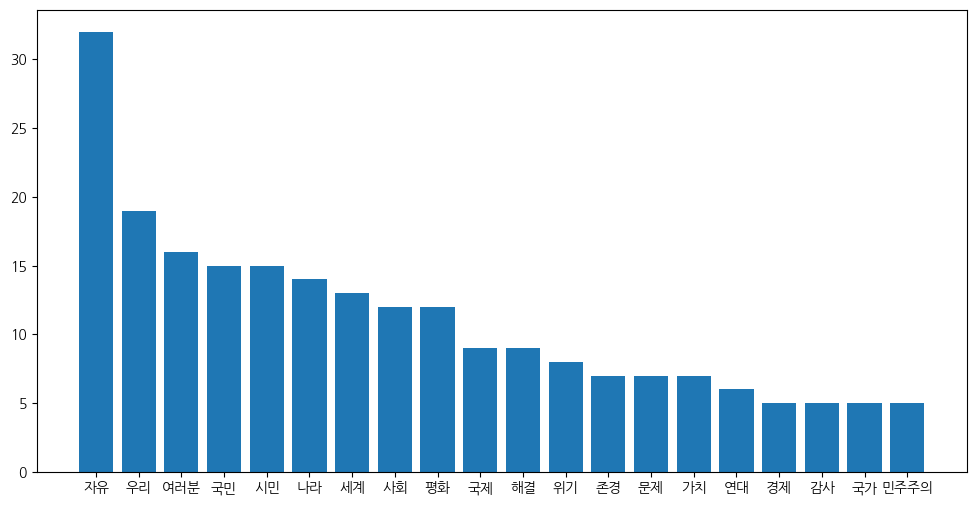

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.rc('font', family='NanumGothic')

x = np.arange(len(top))
keys = [x[0] for x in top]
values = [x[1] for x in top]
plt.figure(figsize=(12,6))
plt.bar(x, values)
plt.xticks(x, keys)

plt.show()